In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import os, sys

from statsmodels.stats import diagnostic as sm
from statsmodels.graphics import tsaplots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#sys.path.insert(1,'C:/Users/Elisa/Documents/ELISA/MAGISTRALE/Tesi/master_thesis-master')
#sys.path.insert(1,'C:/Users/Elisa/Documents/ELISA/MAGISTRALE/Tesi/Myra_dataset')

In [2]:
with open('markers.txt','r') as f:
    markers = [line.rstrip() for line in f]

In [5]:
df_3D = pd.read_csv("Myra_dataset/3Ddataset/ORs3D_countsFormat.csv", index_col = [0])
#df = pd.read_csv("Myra_dataset/RPMnorm_avgALignedReplicates/New_Olfr_DV_highlyexpr_fitted_truncated.csv", index_col = [0])
#highly_expr = df.columns
#df_2D = pd.read_csv("DEGS_DV_PA_23_04.csv", index_col = [0])
df_3D.head()
#df_olfr = df.loc[p_tw_gene.index,:]
#df_olfr


,Olfr1,Olfr1000,Olfr1006,Olfr1009,Olfr101,Olfr1012,Olfr1013,Olfr1014,Olfr1015,Olfr1016,...,Olfr974,Olfr976,Olfr981,Olfr982,Olfr983,Olfr987,Olfr988,Olfr99,Olfr992,Olfr994
1-15-46,0.215405,0.0,0.0,0.319802,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.196182,0.245175,0.262854,0.0,0.208790,0.238684,0.0,0.035323,0.292549
1-15-47,0.214041,0.0,0.0,0.306513,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.186098,0.236647,0.244676,0.0,0.198318,0.228319,0.0,0.033958,0.278968
1-15-48,0.212580,0.0,0.0,0.291631,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.174992,0.226980,0.225094,0.0,0.186839,0.216823,0.0,0.032468,0.264059
1-15-49,0.211020,0.0,0.0,0.275135,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.162858,0.216162,0.204098,0.0,0.174344,0.204186,0.0,0.030850,0.247810
1-15-50,0.209360,0.0,0.0,0.257006,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.149686,0.204181,0.181679,0.0,0.160825,0.190398,0.0,0.029103,0.230210


In [10]:
coord_DV = []
coord_DV_3D = []
coord_AP = []
coord_LML = []

#for item in df.columns:
 #    coord_DV.append(int(item.split("V")[1]))
        
for item in df_3D.index:
     coord_DV_3D.append(int(item.split("-")[0]))
     coord_AP.append(int(item.split("-")[2]))
     coord_LML.append(int(item.split("-")[1]))

In [43]:
count = 0
pos = []

#for item in svg_names:
for item in df.index:
    if (item.find('Olfr') != -1):# == 'H*':
        pos.append(count)
        #print(item)
    count += 1 

df = df.iloc[pos,:]

In [129]:
binar = np.empty([len(df_2D.index),len(df_2D.columns)])
h = 0
for i in df_2D.index:
    X = df_2D.loc[i,:]
    median = np.median(X)
    for j in range(len(df_2D.columns)):
        if X[j] >= median:
            binar[h,j] = 1
        else:
            binar[h,j] = 0
    h += 1
    
binar

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [131]:
df_binarized_2D = pd.DataFrame(binar, index = df_2D.index, columns = df_2D.columns)
df_binarized_2D.head()

,1-1,1-2,1-3,1-4,1-5,1-6,1-7,1-8,1-9,1-10,...,72-73,72-74,72-75,72-76,72-77,72-78,72-79,72-80,72-81,72-82
0610012G03Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1110004F10Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1110008P14Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1110012L19Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1110017D15Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
Q = 0.05
svg_names = []
for i in range(len(df_binarized_2D.index)):
    X = df_binarized_2D.iloc[i,]
    lbvalue , pvalue = sm.acorr_ljungbox(X, lags = (len(df_binarized_2D.columns) - 10))
    if (np.mean(pvalue) < Q):
        svg_names = np.append(svg_names,df_binarized_2D.index[i])
        
        
svg_names

C:\Users\Elisa\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:546: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[:nlags + 1] / avf[0]
C:\Users\Elisa\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Elisa\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Elisa\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


array(['0610012G03Rik', '1110004F10Rik', '1110008P14Rik', ..., 'Stox2',
       'Stra6', 'Strbp'], dtype='<U32')

In [135]:
svg_2D = df_2D.loc[svg_names,]
svg_2D.head()
#svg.to_csv("DVwithPredValsandGenex_svgOR.csv")

,1-1,1-2,1-3,1-4,1-5,1-6,1-7,1-8,1-9,1-10,...,72-73,72-74,72-75,72-76,72-77,72-78,72-79,72-80,72-81,72-82
0610012G03Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1110004F10Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1110008P14Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1110012L19Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1110017D15Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#FIRST CREATE ANNOTATION MATRIX

df_samples = pd.DataFrame(index=df.T.columns)
genes = df.T.index
coord = df.T.columns

#try
#svg_2D = svg_2D.T

In [182]:
svg.keys

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72
Olfr299,0.000000,0.000000,4.450434,1.332125,1.649545,1.949109,2.229530,2.489479,2.454985,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Olfr109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008203,0.106738,0.222351,...,0.147599,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Olfr281,16.444749,9.220804,6.325447,12.411450,13.318018,14.105040,14.771674,15.317526,1.280862,15.422341,...,33.179421,2.022398,160.425488,14.607697,48.957474,49.061277,73.527418,39.894008,49.303386,35.400833
Olfr1015,0.000000,1.697885,10.790477,20.834231,24.952453,28.709859,32.119201,35.193628,37.619417,67.054353,...,2.361577,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.699895,0.000000,0.000000
Olfr1347,26.356652,16.288852,5.982542,14.308357,13.030348,11.855972,10.785595,9.819771,18.151605,5.770316,...,70.663036,73.210795,0.000000,0.000000,40.622582,41.890734,20.220040,56.691485,63.660966,46.377836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Olfr1246,14.867855,0.642200,1.094363,4.354419,4.499878,4.661981,4.837458,5.023137,0.106738,1.778807,...,5.903942,0.000000,0.000000,0.000000,0.159454,0.000000,0.000000,0.000000,0.000000,0.000000
Olfr785,0.000000,0.000000,0.000000,0.248528,0.339499,0.430914,0.522884,0.615534,0.853908,1.212673,...,1.651946,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Olfr1134,0.000000,0.091743,3.560347,3.325701,3.545834,3.724268,3.863676,3.966745,8.847511,9.894615,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Olfr228,4.280140,15.551065,23.587264,12.708522,12.188079,11.698661,11.240372,10.812982,9.043139,19.403868,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.007236,0.000000,0.000000,0.000000,0.000000


In [184]:
%timeit
means = []
for item in genes:
#for item in coord:
    #means.append(np.average(svg_2D.loc[item,svg_2D.keys()].values))
    means.append(np.average(svg.loc[item,svg.keys()].values))
    if(i%100==0):
        print("elapsed %d"%i)

In [185]:
%timeit
variances = []
for item in genes:
#for item in coord:
    variances.append(np.var(svg.loc[item,svg.keys()].values))
    if(i%100==0):
        print("elapsed %d"%i)

In [186]:
df_mv_norm = pd.DataFrame(data=np.array(means), columns=['mean'], index=svg.index)
df_mv_norm.insert(1, 'variance', np.array(variances))

#df_mv.to_csv("meanVariances_DVsvgOR_fitted.csv")

In [187]:
df_mv_norm

,mean,variance
Olfr299,2.108093,13.101691
Olfr109,1.202631,4.811894
Olfr281,23.066650,1922.008215
Olfr1015,26.074076,672.979878
Olfr1347,21.198741,497.104691
...,...,...
Olfr1246,6.534808,120.087085
Olfr785,3.588129,58.233614
Olfr1134,1.759485,5.950162
Olfr228,4.982652,35.562567


In [120]:
directory = 'hsbm_NewDataset/DV_ORsvg_and_markers/fitted/'
p_tw_gene = pd.read_csv('%sl0_genes_prop_topics.csv' %(directory), index_col = [0]).T
p_tw_d = pd.read_csv('%stopsbm_level_0_topic-dist.csv' %(directory), index_col = [1])
#p_tw_gene = p_tw_gene.T

In [83]:
p_tw_d = p_tw_d.iloc[:,1:]
p_tw_d = p_tw_d.dropna()
p_tw_d


,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13
doc,,,,,,,,,,,,,
Olfr1,0.083333,0.066667,0.066667,0.066667,0.083333,0.066667,0.083333,0.233333,0.066667,0.050000,0.050000,0.033333,0.05
Olfr10,0.555556,0.444444,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
Olfr1000,0.172414,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,0.482759,0.137931,0.103448,0.068966,0.000000,0.00
Olfr1006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.583333,0.166667,0.083333,0.000000,0.000000,0.00
Olfr1009,0.156250,0.125000,0.062500,0.000000,0.000000,0.000000,0.000000,0.406250,0.125000,0.093750,0.031250,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Olfr988,0.111111,0.088889,0.088889,0.000000,0.000000,0.088889,0.111111,0.311111,0.088889,0.066667,0.044444,0.000000,0.00
Olfr99,0.089286,0.071429,0.071429,0.071429,0.089286,0.071429,0.089286,0.250000,0.071429,0.053571,0.053571,0.017857,0.00
Olfr992,0.094340,0.075472,0.075472,0.075472,0.094340,0.075472,0.094340,0.264151,0.075472,0.056604,0.018868,0.000000,0.00


In [121]:
Topics = []
for i in range (len(p_tw_gene.columns)):
    Topics.append('Topic%s'%(i))
Topics
p_tw_gene.columns = Topics
p_tw_gene = p_tw_gene.loc[highly_expr.values,:]
p_tw_gene

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14
Olfr1,0.008175,0.023987,0.043674,0.052629,0.064924,0.079977,0.096111,0.108448,0.154978,0.130889,0.104545,0.074725,0.041158,0.015779,0.000000
Olfr1000,0.008384,0.011107,0.017641,0.022718,0.033122,0.050374,0.077559,0.114395,0.195024,0.178499,0.144726,0.099720,0.044748,0.001985,0.000000
Olfr101,0.000756,0.035271,0.081379,0.097936,0.111991,0.121964,0.129962,0.120952,0.131875,0.085605,0.051888,0.025185,0.005236,0.000000,0.000000
Olfr1012,0.002618,0.026492,0.054927,0.066821,0.080914,0.095857,0.112345,0.119717,0.154930,0.118699,0.085399,0.053769,0.023798,0.003715,0.000000
Olfr1013,0.000332,0.025118,0.062917,0.082185,0.103971,0.127671,0.143857,0.130930,0.135048,0.082835,0.048950,0.025306,0.010796,0.008914,0.011169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Olfr97,0.000000,0.012690,0.046271,0.064133,0.080921,0.096158,0.111496,0.119661,0.159326,0.125729,0.092964,0.059855,0.026833,0.003963,0.000000
Olfr972,0.000000,0.026517,0.074800,0.094817,0.110384,0.119269,0.125618,0.118202,0.133673,0.091016,0.058818,0.032614,0.012378,0.001892,0.000000
Olfr983,0.003070,0.025263,0.055775,0.073449,0.097380,0.129241,0.151521,0.138887,0.144285,0.089803,0.054341,0.027881,0.008907,0.000196,0.000000
Olfr984,0.037613,0.033311,0.033279,0.028319,0.029838,0.036570,0.046273,0.063718,0.117276,0.120687,0.117060,0.105810,0.085597,0.091547,0.053102


In [19]:
df = df.loc[:,p_tw_gene.index]

In [122]:
#adata_ptd = sc.AnnData(p_tw_d)
adata = sc.AnnData(p_tw_gene)
adata.obs['Topic'] = np.argmax(adata.X, axis = 1)
#gene_Topic = np.argmax(p_tw_d.to_numpy(),axis = 1)
#adata_ptd.obs["Topic"] = gene_Topic



In [105]:
adata.obs["Topic"]

Olfr1        0
Olfr101      8
Olfr1012     8
Olfr1013     9
Olfr1014     8
            ..
Olfr972      0
Olfr984     11
Olfr987      0
Olfr99       8
Olfr994      0
Name: Topic, Length: 455, dtype: int64

In [123]:
sc.pp.neighbors(adata, use_rep = 'X',metric= 'euclidean')
#sc.pp.neighbors(adata_ptd, use_rep = 'X',metric= 'correlation') #, method = 'gauss'
#adata.obs['n_counts'] = adata.X.sum(1)


In [165]:
adata.obsp['distances']

<1208x1208 sparse matrix of type '<class 'numpy.float64'>'
	with 16868 stored elements in Compressed Sparse Row format>

In [197]:
adata_norm.uns['coord_DV']= coord_DV
adata_2D.uns['coord_PA'] = coord_PA

<Figure size 432x288 with 0 Axes>

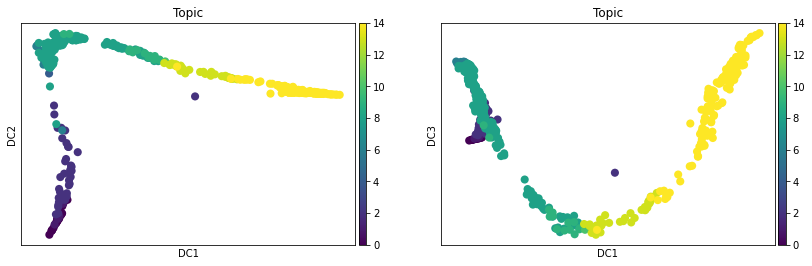

In [126]:
#sc.tl.diffmap(adata)
fig = plt.figure()
fig = sc.pl.diffmap(adata,components=['1,2','1,3'],return_fig = True, color = ['Topic'])
plt.savefig('%sl0_diffmap_prop_gene_highly_expr_euclidean.png'%(directory))
#sc.pl.diffmap(adata, components=['1,2','1,3'])

In [109]:
X_diffmap = adata.obsm["X_diffmap"]
diff_evals = adata.uns["diffmap_evals"]
adata.obs.index

Index(['Olfr1', 'Olfr101', 'Olfr1012', 'Olfr1013', 'Olfr1014', 'Olfr1015',
       'Olfr1018', 'Olfr1019', 'Olfr1025-ps1', 'Olfr1026',
       ...
       'Olfr944', 'Olfr959', 'Olfr96', 'Olfr961', 'Olfr969', 'Olfr972',
       'Olfr984', 'Olfr987', 'Olfr99', 'Olfr994'],
      dtype='object', length=455)

In [127]:
adata.uns['iroot'] = np.where(adata.obs.index == 'Olfr1509')[0][0]
#(adata.obs == 'Olfr1507')


In [128]:
sc.tl.dpt(adata)
pd.Series.idxmax(adata.obs['dpt_pseudotime'])

'Olfr923'

In [43]:
momb = {}
mombaerts = pd.read_csv('Mombaerts_zones.csv',index_col = [0])
for i in range(len(mombaerts.columns)):
    for gene in mombaerts.iloc[:,i][~pd.isnull(mombaerts.iloc[:,i])]:
        print(gene)
        momb[gene] = i
mombaert_zone = pd.DataFrame.from_dict(momb, orient = "index")
mombaert_zone

Olfr160
Olfr16
Olfr19
Olfr77
Olfr749
Olfr1496
Olfr24
Olfr429
Olfr821
Olfr849
Olfr1104
Olfr17
Olfr713
Olfr714
Olfr530
Olfr855
Olfr1395
Olfr1440
Olfr155
Olfr156
Olfr157
Olfr267
Olfr272
Olfr273
Olfr49
Olfr71
Olfr457
Olfr374
Olfr211
Olfr398
Olfr466
Olfr449
Olfr531
Olfr1239
Olfr1324
Olfr1353
Olfr1349
Olfr1412
Olfr2
Olfr6
Olfr124
Olfr167
Olfr286
Olfr322
Olfr533
Olfr536
Olfr1211
Olfr1213
Olfr1310
Olfr1415
Olfr1507
Olfr288
Olfr286
Olfr1228
Olfr1256
Olfr1508
Olfr1509
Olfr15
Olfr370


,0
Olfr160,0
Olfr16,0
Olfr19,0
Olfr77,0
Olfr749,0
Olfr1496,0
Olfr24,1
Olfr429,1
Olfr821,1
Olfr849,1


In [5]:
# to retrieve diffusion pseudotime from destiny

dpt_destiny = pd.read_csv("hsbm_NewDataset/LDA/Countclust_logcounts/compare_hsbm/dpt_weighted_rankcor.csv",index_col = [0])
#dpt_destiny = pd.read_csv("hsbm_NewDataset/3D_ORs/raw_counts/dpt_weightedl2.csv", index_col = [0])
dpt_destiny.columns = ["dpt1","gene"]
dpt_destiny

,dpt1,gene
1,22.409207,Olfr1
2,22.085489,Olfr1000
3,24.176396,Olfr1006
4,24.950436,Olfr1009
5,24.519589,Olfr101
...,...,...
688,23.720935,Olfr987
689,22.566458,Olfr988
690,21.862448,Olfr99
691,22.502343,Olfr992


In [6]:
present = []
present_idx = []
for item in markers:#mombaert_zone.index: 
    
    #c = np.where(adata_obs.index == item)
    c = np.where(dpt_destiny.gene == item)
    
    if len(c[0]) > 0:
        
        #print(item)
        
        present.append(item)
        present_idx.append(c[0][0])
#present
dpt_destiny = dpt_destiny.iloc[present_idx,:]

In [7]:
len(list(dpt_destiny.gene))

62

In [130]:
markers_obs = adata.obs.loc[present,:]
dpt_sorted = pd.Series.sort_values(markers_obs['dpt_pseudotime'])

#dpt_sorted.to_csv("%smarkers_dpt.csv" %(directory))


In [8]:
#dpt_sorted
markers_indexes = pd.read_csv("zones_indexes.csv", index_col = [0])
markers_indexes = markers_indexes.loc[present,:]


#markers_indexes.insert(1,"dpt",markers_obs['dpt_pseudotime'])
markers_indexes.insert(1,"dpt",dpt_destiny.dpt1.values)
#markers_indexes.insert(1,"Topic",markers_obs['Topic'])

for item in range(len(markers_indexes.Index.values)):
    integer = markers_indexes.Index.values[item].split(',')
    if len(integer) == 1:
        markers_indexes.Index.values[item] = float(integer[0])
    else:
        #print(integer[1])
       #print(int(integer[0])+ float(integer[1])/10)
        markers_indexes.Index.values[item] = (int(integer[0])+ float(integer[1])/10)
              
#markers_indexes   


In [9]:
markers_indexes

,Zone,dpt,Index
Gene,,,
Olfr878,1,22.158305,1
Olfr1019,1,24.792992,1
Olfr77,1,23.278578,1.1
Olfr1496,1,24.559408,1.2
Olfr24,1,23.120541,1.3
...,...,...,...
Olfr1260,4,11.463356,4.8
Olfr1228,4,6.619608,4.9
Olfr1507,5,1.545767,5


In [46]:
mombaert_zone = mombaert_zone.loc[present,:]

In [48]:
mombaert_zone.insert(1,"dpt",dpt_destiny.dpt1.values)
mombaert_zone.columns = ["Index","dpt"]
mombaert_zone

,Index,dpt
Olfr160,0,20.624154
Olfr16,0,20.001871
Olfr19,0,20.771057
Olfr77,0,21.374803
Olfr749,0,20.001871
Olfr1496,0,20.695615
Olfr24,1,25.318182
Olfr429,1,21.529968
Olfr821,1,21.185276
Olfr849,1,21.394274


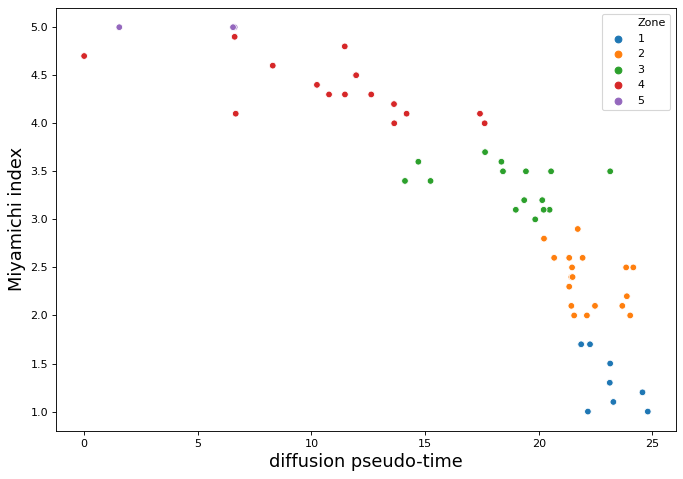

In [13]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,7), dpi= 80) 
cmap = sns.color_palette()#dark=.3, light=.8,as_cmap=True
ax = sns.scatterplot(x="dpt", y = "Index", hue = "Zone",data = markers_indexes, palette = sns.color_palette()[:5])# c=as.float(markers_indexes.Zone))
plt.xlabel("diffusion pseudo-time",fontsize = 16)
plt.ylabel ("Miyamichi index", fontsize = 16)
plt.savefig("hsbm_NewDataset/LDA/Countclust_logcounts/compare_hsbm/LDA_3D_dpt_vs_Miyamichi.png")

In [213]:
markers_obs_2D = adata_2D.obs.loc[markers,:]
dpt_sorted = pd.Series.sort_values(adata_2D.obs['dpt_pseudotime'])

dpt_sorted.to_csv("svg_dpt_2D.csv")

C:\Users\Elisa\Anaconda\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\Elisa\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.


In [11]:
# compute Spearman correlation coefficient
from scipy.stats import spearmanr


table = markers_indexes[{"dpt","Index"}].values
rho,pvalue = spearmanr(table)


In [12]:
rho

-0.9200626667096724